##loading required packages and data

In [ ]:
###1. Load Data and Splot Data
#from tensorflow.keras.datasets import mnist
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical



import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
# (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

##Data splitting

In [ ]:
# splitting the data into test and train set
(X_train, Y_train), (X_test, Y_test) = fashion_mnist.load_data()

##Display the Dataset

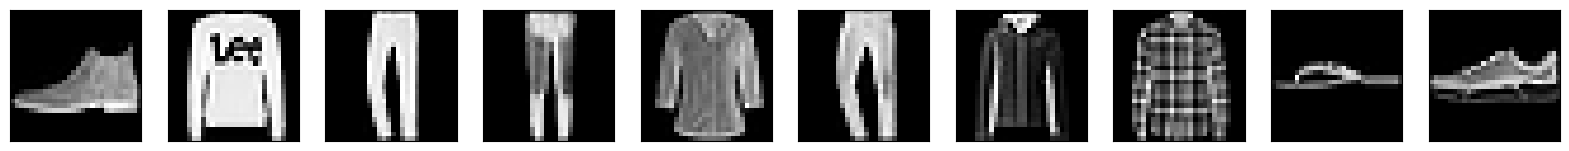

In [ ]:
import matplotlib.pyplot as plt

# Number of images to display
n = 10

# Create a figure to display the images
plt.figure(figsize=(20, 4))

# Loop through the first 'n' images
for i in range(n):
    # Create a subplot within the figure
    ax = plt.subplot(2, n, i + 1)

    # Display the original image
    plt.imshow(X_test[i].reshape(28, 28))

    # Set colormap to grayscale
    plt.gray()

    # Hide x-axis and y-axis labels and ticks
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

# Show the figure with the images
plt.show()

# Close the figure
plt.close()

**Flatten the images**

In [ ]:
# Print the shapes of the original training data and labels
print("Previous X_train shape: {} \nPrevious Y_train shape:{}".format(X_train.shape, Y_train.shape))

# Reshape training and testing data to a flat format (flattening the images)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(10000, 784)

Previous X_train shape: (60000, 28, 28) 
Previous Y_train shape:(60000,)


##Min - Max scaling

In [ ]:
# Convert the data type of the images to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# Normalize the pixel values to a range between 0 and 1  # Zero is for Black  #1 for White
X_train /= 255
X_test /= 255

##Target variables

In [ ]:
# Number of classes in the dataset
classes = 10
# Convert the labels to one-hot encoded format
Y_train = to_categorical(Y_train, classes)
Y_test = to_categorical(Y_test, classes)

# Print the shapes of the preprocessed training data and labels
print("New X_train shape: {} \nNew Y_train shape:{}".format(X_train.shape, Y_train.shape))

New X_train shape: (60000, 784) 
New Y_train shape:(60000, 10)


##Hyper-parameters

##Building the FCN Model

In [ ]:
### 4. Build the model ###

# Create a Sequential model, which allows us to build a neural network layer by layer
model = Sequential()

# Add the first hidden layer with 'hidden1' neurons, using ReLU activation function
# The 'input_dim' specifies the input size for this layer
model.add(Dense(hidden1, input_dim=input_size, activation='relu'))
# output = relu(dot(W, input) + bias)

# Add the second hidden layer with 'hidden2' neurons, also using ReLU activation function
model.add(Dense(hidden2, activation='relu'))

# Add the third hidden layer with 'hidden3' neurons, also using ReLU activation function
model.add(Dense(hidden3, activation='relu'))

# Add the output layer with 'classes' neurons, using softmax activation function
# Softmax activation ensures that the output values represent probabilities of each class
model.add(Dense(classes, activation='softmax'))

### Compilation ###

# Compile the model by specifying the loss function, optimizer, and evaluation metrics
model.compile(loss='categorical_crossentropy',
              metrics=['accuracy'], optimizer='sgd')

# Display a summary of the model architecture, showing the layers and parameter counts
model.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 400)               314000    
                                                                 
 dense_74 (Dense)            (None, 200)               80200     
                                                                 
 dense_75 (Dense)            (None, 100)               20100     
                                                                 
 dense_76 (Dense)            (None, 10)                1010      
                                                                 
Total params: 415310 (1.58 MB)
Trainable params: 415310 (1.58 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


##Training The Model

In [ ]:
# Import necessary libraries
from time import time

# Record the current time to measure training time
tic = time()

# Fit the model on the training data
model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, verbose=1)

# Record the time after model training
toc = time()

# Calculate and print the time taken for model training
print("Model training took {} secs".format(toc - tic))

# Testing the trained model
### 5. Test
# You can continue your code from here...

Epoch 1/100
300/300 [==============================] - 43s 17ms/step - loss: 1.2394 - accuracy: 0.6135
Epoch 2/100
300/300 [==============================] - 5s 17ms/step - loss: 0.6948 - accuracy: 0.7693
Epoch 3/100
300/300 [==============================] - 5s 18ms/step - loss: 0.5920 - accuracy: 0.8038
Epoch 4/100
300/300 [==============================] - 5s 18ms/step - loss: 0.5419 - accuracy: 0.8164
Epoch 5/100
300/300 [==============================] - 5s 17ms/step - loss: 0.5065 - accuracy: 0.8260
Epoch 6/100
300/300 [==============================] - 5s 18ms/step - loss: 0.4843 - accuracy: 0.8316
Epoch 7/100
300/300 [==============================] - 6s 19ms/step - loss: 0.4695 - accuracy: 0.8365
Epoch 8/100
300/300 [==============================] - 5s 17ms/step - loss: 0.4551 - accuracy: 0.8411
Epoch 9/100
300/300 [==============================] - 5s 18ms/step - loss: 0.4436 - accuracy: 0.8454
Epoch 10/100
300/300 [==============================] - 6s 19ms/step - loss: 0.43

##Testing The Model

In [ ]:
# Import the necessary libraries
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt

# Predict probabilities for the test set using the trained model
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

# Calculate and print the test accuracy using predicted and true labels
test_accuracy = accuracy_score(y_pred, Y_test)
print("\nTest accuracy: {}".format(test_accuracy))


Test accuracy: 0.8673


In [ ]:
# Define a mask for selecting a range of indices (20 to 49)
mask = range(20, 50)

# Select the first 20 samples from the test set for visualization
X_valid = X_test[0:20]
actual_labels = Y_test[0:20]

# Predict probabilities for the selected validation samples
y_pred_probs_valid = model.predict(X_valid)
y_pred_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 [==============================] - 0s 22ms/step


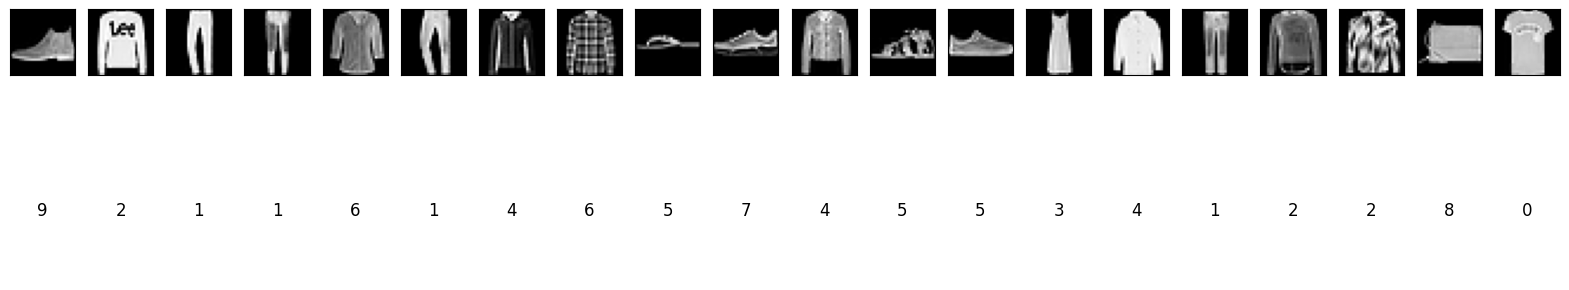

In [ ]:
# Set up a figure to display images
n = len(X_valid)
plt.figure(figsize=(20, 4))

for i in range(n):
    # Display the original image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(X_valid[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the predicted digit
    predicted_digit = np.argmax(y_pred_probs_valid[i])
    ax = plt.subplot(2, n, i + 1 + n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')

# Show the plotted images
plt.show()

# Close the plot
plt.close()
